In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

import numpy as np

import pandas as pd
import amat_utils

In [ ]:
# from rdkit import Chem
# from rdkit.Chem import rdmolops
# # Create a molecule from SMILES
# file = open("case_smiles.txt","r")
# smi = file.read()

# target_smiles = smi
# mol = Chem.MolFromSmiles(target_smiles)
# # Find potential stereocenters
# stereo_info = rdmolops.FindPotentialStereo(mol)
# # Print stereochemical information
# for element in stereo_info:
#    print(f"Type: {element.type}, Centered On: {element.centeredOn}, "
#          f"Specified: {element.specified}, Descriptor: {element.descriptor}")

## initialize

create the mol with atom numbering for the target

In [2]:
file = open("case_smiles.txt","r")
smi = file.read()

target_smiles = smi
target = Chem.MolFromSmiles(target_smiles)
Chem.Kekulize(target,clearAromaticFlags=True)

In [3]:
target_atoms = [atm.GetAtomicNum() for atm in target.GetAtoms()]
target_symbs = [atm.GetSymbol() for atm in target.GetAtoms()]

In [4]:
amat = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)
amat_init = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)

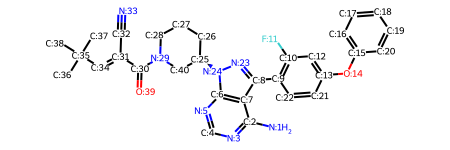

In [5]:
amat_utils.mol_with_atom_index(target)

### Experimental c

make the change-log from the csv input. 
Meant as an intemediate to generate adjacency matrices for all synthetic intermediates

In [6]:
changelogs = amat_utils.make_changelogs("./edit_files/edits_case_easy.csv")
changelogs[:3]
# check the changelogs here.

[{'edits': ()},
 {'pad': 0, 'pad_elem': [], 'edits': [(25, 25, 1)]},
 {'pad': 1, 'pad_elem': [17], 'edits': [(30, 29, -1), (30, 41, 1)]}]

generate matrices

In [7]:
# usually the [1:] is because the first entry is blank.
out_1,final_atoms_1 = amat_utils.apply_changes(amat_init, target_atoms,changelogs[1:])

this is for checking that the mol objects don't break valency rules

In [8]:
for i in range(len(out_1)):
    print(i)
    m = amat_utils.molFromAdjMat(final_atoms_1,out_1[i],sanitize=False)
    # print(m)
    # print(Chem.MolToSmiles(m))
    Chem.SanitizeMol(m)
    print(Chem.MolToSmiles(m))

0
Bc1ccc(Oc2ccccc2)cc1F.CC(C)(C)C=C(C#N)C(=O)Cl.CN1CCCC(O)C1.Nc1ncnc2[nH]nc(Br)c12
1
Bc1ccc(Oc2ccccc2)cc1F.CC(C)(C)C=C(C#N)C(=O)Cl.CN1CCCC(n2nc(Br)c3c(N)ncnc32)C1.O
2
B.Br.CC(C)(C)C=C(C#N)C(=O)Cl.CN1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3F)c3c(N)ncnc32)C1.O
3
B.Br.C.CC(C)(C)C=C(C#N)C(=O)Cl.Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1F)nn2C1CCCNC1.O
4
B.Br.C.CC(C)(C)C=C(C#N)C(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3F)c3c(N)ncnc32)C1.Cl.O
5
B.Br.C.CC(C)(C)C=C(C#N)C(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3F)c3c(N)ncnc32)C1.Cl.O


save matrices as npz file

In [9]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}
np.savez("./matrices/case_easy",**save_dict)

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
# IPythonConsole.drawOptions.addAtomIndices = False
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

# Set the size of the plot (e.g., 800x800 pixels)
final_step = Chem.MolFromSmiles("B.Br.C.CC(C)(C)C=C(C#N)C(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3F)c3c(N)ncnc32)C1.Cl.O")
mol_with_atom_index(final_step)

